In [28]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv('tasks_with_synthetic_data.csv')

In [29]:
y_pd = data[["synergy"]]
y_array = y_pd.to_numpy()
X_pd = data[["Conceptual-Behavioral", "Type 1 (Planning)", "Type 2 (Generate)", "Type 5 (Cognitive Conflict)", "Type 7 (Battle)", "Type 8 (Performance)", "Divisible-Unitary", "Maximizing", "Optimizing", "Outcome Multiplicity", "Solution Scheme Multiplicity", "Decision Verifiability", "Shared Knowledge", "Answer Recognizability", "Within-System Solution", "Time Solvability", "Type 3 and Type 4 (Objective Correctness)", "Conflicting Tradeoffs", "Solution Scheme Outcome Uncertainty", "Eureka Question", "Intellectual-Manipulative", "Intellective-Judgmental", "Creativity Input", "Type 6 (Mixed-Motive)"]]
X_array = X_pd.to_numpy()

In [31]:
# fitted SVM
fitted_svm = SVC(kernel = 'linear')
fitted_svm.fit(X_array, y_array)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [41]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['#E26860' if c < 0 else '#52B0B5' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

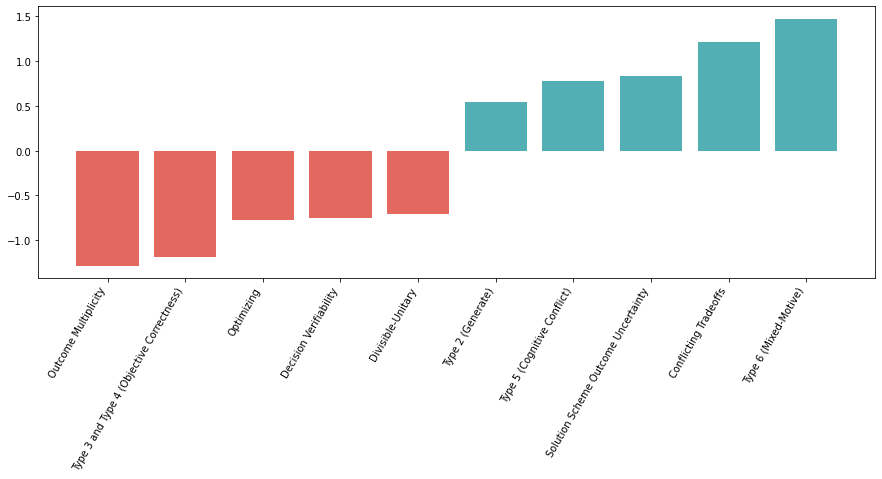

In [42]:
plot_coefficients(fitted_svm, X_pd.columns.to_list(), top_features = 5)